# Contador preciso

## Sobre el notebook

Este notebook lee el archivo `results_lock.csv` y se genera una gráfica de **Threads .vs. Time (seg)**.

> **Importante**
> 
> Asegúrese de ejecutar este notebook desde el mismo directorio que `results_lock.csv` (o ajustar la ruta).

## Sobre el experimento

En este segundo experimento, el contador compartido fue protegido mediante un **`pthread_mutex_t`**, 
de modo que solo un hilo puede modificar la variable `value` a la vez. Esto garantiza **exclusión mutua** en la sección crítica.

,Threads,Time(s),Expected,Actual
0,1,0.0358,1000000,1000000
1,2,0.1170,2000000,2000000
2,4,0.1941,4000000,4000000
3,8,0.3430,8000000,8000000
4,16,0.7454,16000000,16000000


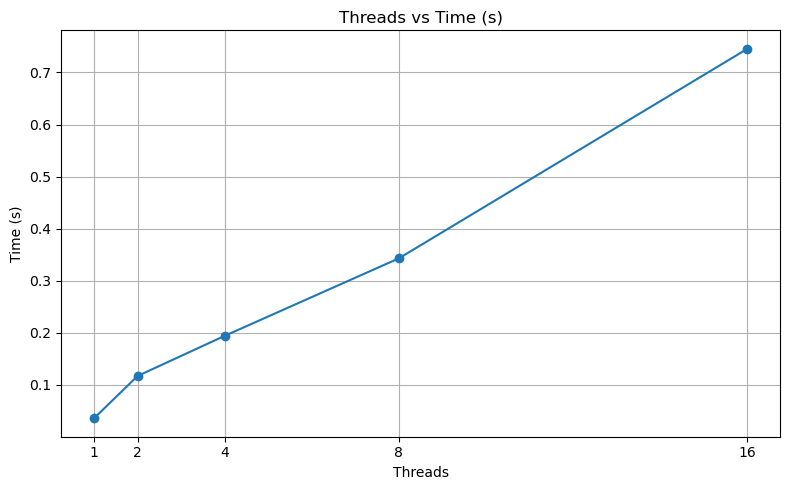

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta al CSV (si ejecutas el notebook desde otra carpeta, cambia la ruta)
csv_path = 'results_lock.csv'

# Leer CSV
df = pd.read_csv(csv_path)
display(df)

# Crear la gráfica
plt.figure(figsize=(8,5))
plt.plot(df['Threads'], df['Time(s)'], marker='o', linestyle='-')
plt.xlabel('Threads')
plt.ylabel('Time (s)')
plt.title('Threads vs Time (s)')
plt.grid(True)
plt.xticks(df['Threads'])
plt.tight_layout()
plt.show()

## Observaciones principales

- El **valor obtenido coincide exactamente con el valor esperado** en todos los casos.  
  Esto confirma que **las condiciones de carrera fueron eliminadas** gracias al uso del `mutex`.  
- A medida que **aumenta el número de hilos**, el **tiempo de ejecución también aumenta**, 
  lo cual es el comportamiento esperado:
  - Aunque existen varios hilos, el acceso al contador está **serializado**.
  - Cada hilo debe esperar a que el `mutex` se libere para realizar su incremento.
  - Se pierde el paralelismo efectivo, pero se mantiene la **consistencia de los datos**.

## Conclusiones

- El **mutex asegura la corrección** de los resultados al evitar interferencias entre hilos.  
- El problema de usar el mutex radica en que este **introduce una penalización en el desempeño**, ya que cada incremento se ejecuta de forma secuencial.  
- Este experimento demuestra el clásico **compromiso entre rendimiento y consistencia** en los sistemas concurrentes.  
- En contextos reales, para mejorar el desempeño sin sacrificar la exactitud.

En síntesis, **usar mutex soluciona las condiciones de carrera, pero no mejora el paralelismo**. La elección del mecanismo de sincronización dependerá del balance entre **correctitud** y **eficiencia** requerido por la aplicación.